In [10]:
from data_loaders import load_mnist
import numpy as np
import matplotlib.pyplot as plt
import os
from model import * 
import torch
from PIL import Image
import torchvision
from torchvision import datasets, transforms
import torch
from constants import * 
import torch.nn.functional as functional
from tqdm import tqdm

In [11]:
def load_mnist(batch_size, rotate=0):
  dataset_transform = transforms.Compose([
               transforms.RandomRotation([rotate, rotate+1]),
               transforms.ToTensor(),
               transforms.Normalize((0.1307,), (0.3081,))
           ])
  
  train_dataset = datasets.MNIST('../data', 
                               train=True, 
                               download=True, 
                               transform=dataset_transform)
  test_dataset = datasets.MNIST('../data', 
                                 train=False, 
                                 download=True, 
                                 transform=dataset_transform)


  train_loader = torch.utils.data.DataLoader(train_dataset, 
                                             batch_size=batch_size,
                                             shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_dataset, 
                                             batch_size=batch_size,
                                             shuffle=False)
  return train_loader, test_loader



In [4]:
capsnet = CapsNet(reconstruction_type="FC")
capsnet.load_state_dict(torch.load("saved_models/model22.pt"))
capsnet.cuda()
""

''

In [5]:
plt.imshow(images[1,0].data.numpy(), cmap="gray")

NameError: name 'images' is not defined

In [6]:
iter(load_mnist(20)[1]).next()[1]

tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9,  0,  6,  9,  0,
         1,  5,  9,  7,  3,  4])

In [12]:
j = 16
confidences_correct = []
confidences_correct_i = []
confidences_false = []
confidences_false_i = []
for i in tqdm(range(0, 360, 2)):
  _, test_loader = load_mnist(j+1, rotate=i)
  images, targets = iter(test_loader).next()

  target = targets[j].item()
  output, reconstruction, _ = capsnet(images.cuda())
  output = torch.norm(output, dim=2)
  pred = output.squeeze().max(dim=1)[1][j].item()
  
  if pred == target:
    confidences_correct.append(output[j,target,0].item())
    confidences_correct_i.append(i)
  else:
    confidences_false.append(output[j,target,0].item())
    confidences_false_i.append(i)
    
# Show Image
_, test_loader = load_mnist(j+1, rotate=0)
images, targets = iter(test_loader).next()
im = images[j, 0].data.numpy()
plt.imshow(im, cmap="gray")

# Print graph
print(targets[j])
plt.figure(figsize=(20,10))
plt.plot(confidences_correct_i, confidences_correct, '.')
plt.plot(confidences_false_i, confidences_false, '.')
plt.xlim([0,360])
plt.ylim([0,1])
plt.plot([86,86], [0,1])
plt.plot([360-46,360-46], [0,1])

100%|██████████| 180/180 [00:33<00:00,  5.42it/s]


tensor(9)


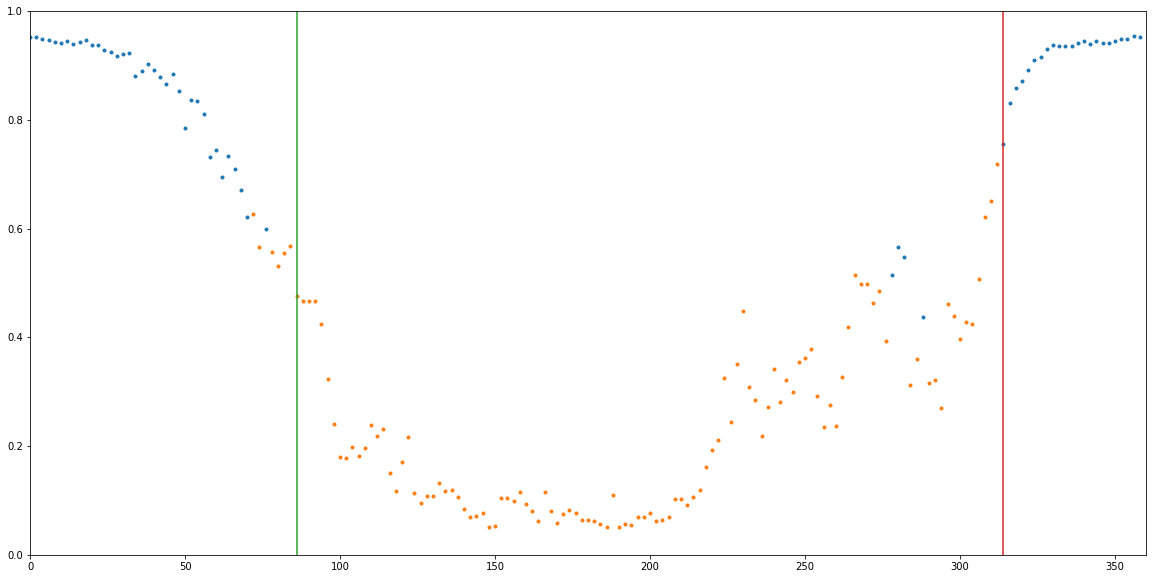